## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    
    x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
       
    if flatten:
        x = x.reshape(len(x), -1)
    return x

    
def preproc_y(y,num_classes=10):
    
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [0]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train.shape

(50000, 3072)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    
    model = Sequential()
    model.add(Dense(units = input_shape[1] ,input_dim = input_shape[1], kernel_initializer = 'normal', activation = 'relu',name = 'input'))
    
    for i, n_units in enumerate(num_neurons):
        model.add(Dense(units=n_units, kernel_initializer='normal', activation='relu',name="hidden_layer"+str(i+1)))  
           
                
    model.add(Dense(units=output_units,kernel_initializer='normal', activation='softmax',name='output'))

    return(model)


In [8]:
model = build_mlp(input_shape=x_train.shape)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 3072)              9440256   
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
outp

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.7169 - acc: 0.3826 - val_loss: 1.5370 - val_acc: 0.4605
Epoch 2/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.4658 - acc: 0.4851 - val_loss: 1.4263 - val_acc: 0.5001
Epoch 3/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.3326 - acc: 0.5331 - val_loss: 1.3615 - val_acc: 0.5171
Epoch 4/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.2244 - acc: 0.5712 - val_loss: 1.3539 - val_acc: 0.5263
Epoch 5/100
50000/50000 [==============================] - 5s 108us/step - loss: 1.1283 - acc: 0.6013 - val_loss: 1.3180 - val_acc: 0.5404
Epoch 6/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.0265 - acc: 0.6391 - val_loss: 1.3447 - val_acc: 0.5451
Epoch 7/100
50000/50000 [==============================] - 5s 108us/

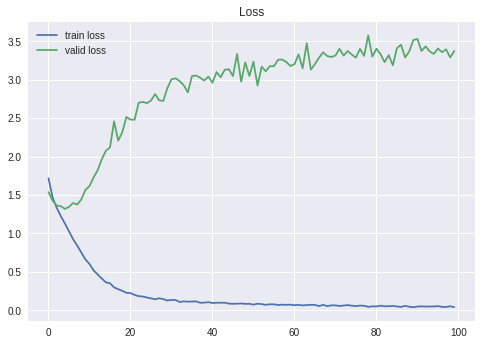

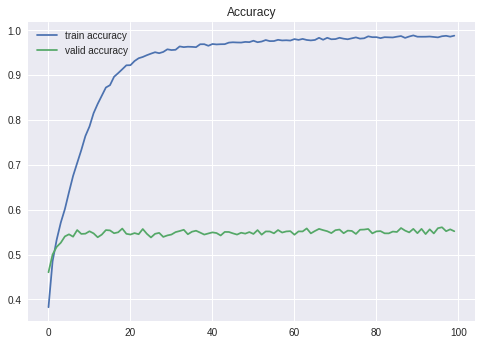

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()